In [4]:
import numpy as np # linear algebra
#import pandas as pd 
import os
import cv2
from time import sleep
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, MaxPooling2D, Activation
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as k
import re
from glob import glob
from matplotlib import pyplot as plt
#from tqdm import tqdm_notebook as tqdm

In [5]:
norm_path = 'chest_xray/{}/NORMAL'
pneumonia_path = 'chest_xray/{}/PNEUMONIA'

In [6]:
norm_path = 'chest_xray/{}/NORMAL'
pneumonia_path = 'chest_xray/{}/PNEUMONIA'

In [7]:
imagePath = glob('chest_xray/train/**/*.jpeg')
imagePath

['chest_xray/train\\NORMAL\\normal_1000.jpeg',
 'chest_xray/train\\NORMAL\\normal_1001.jpeg',
 'chest_xray/train\\NORMAL\\normal_1002.jpeg',
 'chest_xray/train\\NORMAL\\normal_1003.jpeg',
 'chest_xray/train\\NORMAL\\normal_1004.jpeg',
 'chest_xray/train\\NORMAL\\normal_1006.jpeg',
 'chest_xray/train\\NORMAL\\normal_1007.jpeg',
 'chest_xray/train\\NORMAL\\normal_1008.jpeg',
 'chest_xray/train\\NORMAL\\normal_1009.jpeg',
 'chest_xray/train\\NORMAL\\normal_1010.jpeg',
 'chest_xray/train\\NORMAL\\normal_1011.jpeg',
 'chest_xray/train\\NORMAL\\normal_1012.jpeg',
 'chest_xray/train\\NORMAL\\normal_1013.jpeg',
 'chest_xray/train\\NORMAL\\normal_1014.jpeg',
 'chest_xray/train\\NORMAL\\normal_1015.jpeg',
 'chest_xray/train\\NORMAL\\normal_1016.jpeg',
 'chest_xray/train\\NORMAL\\normal_1017.jpeg',
 'chest_xray/train\\NORMAL\\normal_1020.jpeg',
 'chest_xray/train\\NORMAL\\normal_1021.jpeg',
 'chest_xray/train\\NORMAL\\normal_1022.jpeg',
 'chest_xray/train\\NORMAL\\normal_1024.jpeg',
 'chest_xray/

In [8]:
x = []

y = []

norm_pattern = re.compile('normal')

for img in imagePath:

    try:

        im = cv2.imread(img)

        x.append(cv2.resize(im, (224,224), interpolation = cv2.INTER_CUBIC))

        if norm_pattern.search(img) == None:

            y.append(0)

        else:

            y.append(1)

    except Exception as e:

        print (e)

OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



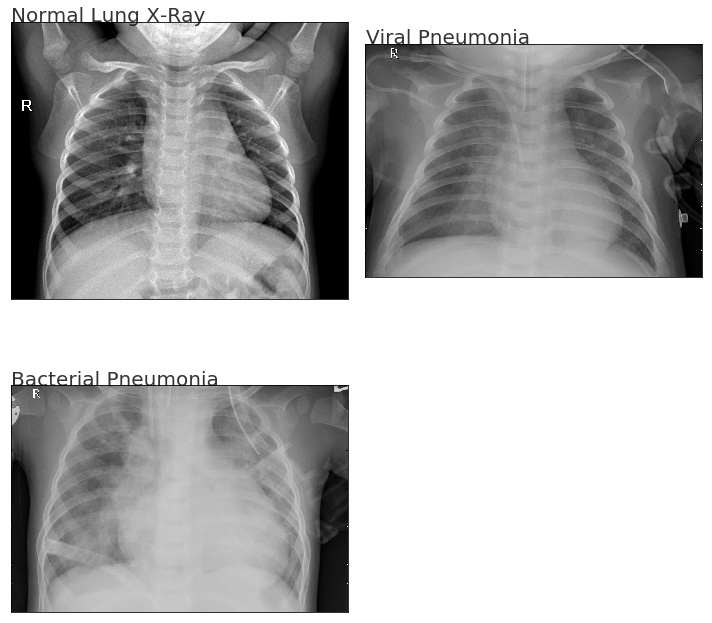

In [6]:
from matplotlib import pyplot as plt

virus_effected = 'chest_xray/train\\\\PNEUMONIA\\\\person1168_virus_1966.jpeg'

bacteria_effected = 'chest_xray/train\\\\PNEUMONIA\\\\person1168_bacteria_3115.jpeg'

normal =  'chest_xray/train\\\\NORMAL\\\\normal_792.jpeg'

fig = plt.figure(figsize=(10,10))

sub1 = plt.subplot(2, 2, 1)

sub1.set_xticks(())

sub1.set_yticks(())

sub1.imshow(cv2.imread(normal))

sub1.text(0.5, 0.5, 'Normal Lung X-Ray', size=20, alpha=.8)

sub2 = plt.subplot(2, 2, 2)

sub2.set_xticks(())

sub2.set_yticks(())

sub2.imshow(cv2.imread(virus_effected))

sub2.text(0.5, 0.5, 'Viral Pneumonia', size=20, alpha=.8)

sub3 = plt.subplot(2, 2, 3)

sub3.set_xticks(())

sub3.set_yticks(())

sub3.imshow(cv2.imread(bacteria_effected))

sub3.text(0.5, 0.5, 'Bacterial Pneumonia',size=20, alpha=.8)

fig.tight_layout()

plt.show()

Converting the list data structure into numpy array. <br>

Because in numpy array we use a special feature named:

Array Broadcasting, which helps in performing any operation of on every element of array thorugh one line. 

In [12]:
x = np.array(x)
y = np.array(y)

In [13]:
## Creating the 2D array of labels
## If the class label is 0 then index 0 will inititalize with 1 else it will remain 0 i.e. array looks like [[1, 0]]

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101)

y_train = to_categorical(y_train, num_classes = 2)

y_valid = to_categorical(y_valid, num_classes = 2)

del x, y

Here, i created a sequential model which having multiple internal layers. 

It consists of:

- $4$ Convulational neural layers

- $4$ Maximum pooling layer

- $1$ Global Average pooling layer (It will implemented before Output layer)

- and many batchnormalization, dropout and dense layers

In [9]:
import keras

from keras.models import Sequential,Input,Model

from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed

from keras.layers.normalization import BatchNormalization

from keras.layers.advanced_activations import LeakyReLU 


##########################################################
# Created a sequential model with multiple feature extraction layers.
# Input layer will take data in batches each batch will be of size 32. 
# In the input layer i applied a filter of 7x7 on the batch of 32 pixels. 
# 
# Max Pooling layer wil have a filter of size 2x2
# 
##########################################################

model = Sequential()

model.add(Conv2D(32,(7,7),activation='relu'))

model.add(MaxPooling2D((2,2)))

model.add(BatchNormalization())

model.add(Dropout(0.15))

model.add(Conv2D(64,(5,5),activation='relu'))

model.add(MaxPooling2D((2,2)))

model.add(BatchNormalization())

model.add(Dropout(0.15))

model.add(Conv2D(128,(3,3),activation='relu'))

model.add(MaxPooling2D((2,2)))

model.add(BatchNormalization())

model.add(Dropout(0.15))

model.add(Conv2D(128,(3,3),activation='relu'))

model.add(MaxPooling2D((2,2)))
 
model.add(BatchNormalization())

model.add(Dropout(0.15))

model.add(GlobalAveragePooling2D())

model.add(Dense(1000, activation='relu'))

model.add(Dense(2,activation='softmax')) ## This one is output layer

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

#model.summary()

In [11]:
from keras.callbacks import ModelCheckpoint

mcp = ModelCheckpoint(filepath='model_check_path.hdf5',monitor="val_acc", save_best_only=True, save_weights_only=False)

hist = model.fit(x_train,y_train,batch_size = 32, epochs = 40, verbose=1,  validation_split=0.2, callbacks=[mcp])

Train on 2916 samples, validate on 729 samples
Epoch 1/40
2916/2916 [==============================] - 84s 29ms/step - loss: 0.2031 - acc: 0.9211 - val_loss: 1.9645 - val_acc: 0.8573
Epoch 2/40
2916/2916 [==============================] - 81s 28ms/step - loss: 0.1608 - acc: 0.9372 - val_loss: 0.7326 - val_acc: 0.8587
Epoch 3/40
2916/2916 [==============================] - 81s 28ms/step - loss: 0.1386 - acc: 0.9475 - val_loss: 0.1137 - val_acc: 0.9575
Epoch 4/40
2916/2916 [==============================] - 81s 28ms/step - loss: 0.1092 - acc: 0.9602 - val_loss: 2.2781 - val_acc: 0.8573
Epoch 5/40
2916/2916 [==============================] - 81s 28ms/step - loss: 0.0997 - acc: 0.9609 - val_loss: 0.1356 - val_acc: 0.9451
Epoch 6/40
2916/2916 [==============================] - 81s 28ms/step - loss: 0.0831 - acc: 0.9674 - val_loss: 0.3394 - val_acc: 0.8971
Epoch 7/40
2916/2916 [==============================] - 81s 28ms/step - loss: 0.0911 - acc: 0.9688 - val_loss: 2.2994 - val_acc: 0.8573
E

NameError: name 'hist' is not defined

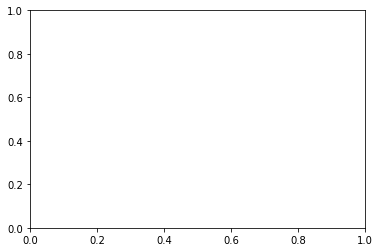

In [18]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.set_facecolor('w')

ax.grid(b=False)

ax.plot(hist.history['acc'], color='red')

ax.plot(hist.history['val_acc'], color ='green')

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='lower right')

plt.show()

As, we can not train same model again and again because its computationally complex. So, i am going to store my model into a serialized manner. And later i'm just have to deserialize my model and perform prediction on it. 



To serialize the data i'm using 

```python

import pickle

pickle.dump(model, open('FileName.pkl', 'rb')) #To serialize the model

```

# To deserialize we use
```
pickle.load(open('FileName.pkl', 'rb'))
```

In [ ]:
import pickle



with open('pred_model.pkl', 'wb') as f:

    pickle.dump(model, f)

    f.close()

model = None

In [1]:
import pickle

model = pickle.load(open('pred_model.pkl', 'rb'))

Using TensorFlow backend.


In [9]:
def predict(model, img_path):

    if type(img_path) == str:

        img_path = [img_path]

    x = []

    for img in img_path:

        im = cv2.imread(img)

        plt.imshow(im)

        x.append((cv2.resize(im, (224,224), interpolation = cv2.INTER_CUBIC)))

    x = np.array(x)

    return model.predict(x)

0

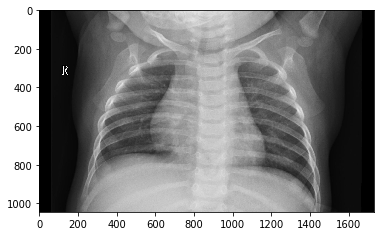

In [21]:
np.argmax(predict(model, norm_path.format('test') + '/normal_9.jpeg'))

In [14]:
from sklearn.metrics import classification_report

pred = model.predict(x_valid)

print(classification_report(np.argmax(y_valid, axis = 1),np.argmax(pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       764
           1       0.94      0.89      0.92       148

   micro avg       0.97      0.97      0.97       912
   macro avg       0.96      0.94      0.95       912
weighted avg       0.97      0.97      0.97       912



In [16]:
def plot_confusion_matrix(cm,
                          
                          target_names,
                          
                          title='Confusion matrix',
                          
                          cmap=None,
                          
                          normalize=True):
    
    import matplotlib.pyplot as plt
    
    import numpy as np
    
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    
    misclass = 1 - accuracy

    if cmap is None:
    
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    
    plt.grid(b=False)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    
    plt.colorbar()

    if target_names is not None:
  
        tick_marks = np.arange(len(target_names))
        
        plt.xticks(tick_marks, target_names, rotation=45)
        
        plt.yticks(tick_marks, target_names)
    
    if normalize:
    
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    
        if normalize:
        
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
            
                     horizontalalignment="center",
                     
                     color="white" if cm[i, j] > thresh else "black")
        
        else:
        
            plt.text(j, i, "{:,}".format(cm[i, j]),
            
                     horizontalalignment="center",
                     
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    
    plt.ylabel('True label')
    
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    
    plt.show()

    

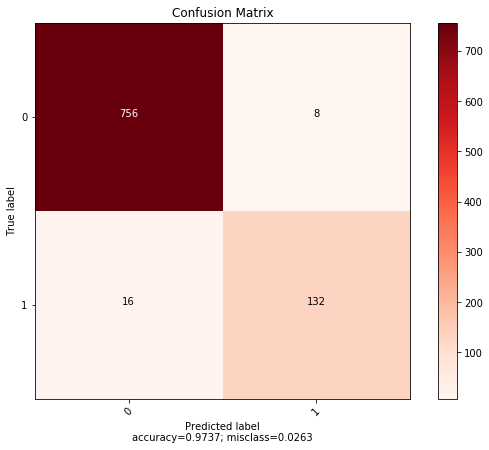

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_valid, axis = 1),np.argmax(pred, axis = 1))
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap ='Reds',
                      target_names = ['0','1'],
                      title        = "Confusion Matrix")

In [ ]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph

In [ ]:
from keras import backend as K

# Create, compile and train model...

frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])

In [ ]:
[out for out in model.outputs]

In [ ]:
[inp for inp in model.inputs]

In [ ]:
import tensorflowjs as tf

In [ ]:
tf.train.write_graph(frozen_graph, './model_dir', 'chest_pred.pb', as_text = False)

In [ ]:
from tensorflow.python.platform import gfile

with tf.Session() as sess:
    with gfile.FastGFile('./tensorflow_model/chest_pred.pb', 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        sess.graph.as_default()
        g_in = tf.import_graph_def(graph_def)
        tensor_input = sess.graph.get_tensor_by_name('sequential_1_input_1:0')
        tensor_output = sess.graph.get_tensor_by_name('dense_2_1/Softmax:0')
        sess.run(tensor_output, {tensor_input:[x_valid[0]]})

In [ ]:
for i in sess.graph.get_operations():
    print (i)

In [ ]:
def print_graph_nodes(filename):
    import tensorflow as tf
    g = tf.GraphDef()
    g.ParseFromString(open(filename, 'rb').read())
    print()
    print(filename)
    print("=======================INPUT=========================")
    print([n for n in g.node if n.name.find('input') != -1])
    print("=======================OUTPUT========================")
    print([n for n in g.node if n.name.find('output') != -1])
    #print ([n for n in g.node if n.name.find('dense_2_1/Softmax') != -1])
    print("===================KERAS_LEARNING=====================")
    print([n for n in g.node if n.name.find('keras_learning_phase') != -1])
    print("======================================================")
    print()

In [ ]:
print_graph_nodes('./tensorflow_model//chest_pred.pb')

In [ ]:
model.outputs

In [ ]:
[n for n in graph_def.node if n.name.find('batch_normalization_4_1/moving_mean') != -1]

In [ ]:
a = [n for n in model.weights if n.name.find('batch_norma')!= -1]

In [ ]:
a[10].value

In [ ]:
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from keras.models import load_model
from keras import backend as K
import os.path as osp

#model = load_model(path_to_model)
nb_classes = 1 # The number of output nodes in the model
prefix_output_node_names_of_final_network = 'output_node'

K.set_learning_phase(0)

pred = [None]*nb_classes
pred_node_names = [None]*nb_classes
for i in range(nb_classes):
    pred_node_names[i] = prefix_output_node_names_of_final_network+str(i)
    pred[i] = tf.identity(model.output[i], name=pred_node_names[i])
print('output nodes names are: ', pred_node_names)

sess = K.get_session()
output_fld = 'tensorflow_model/'
if not os.path.isdir(output_fld):
    os.mkdir(output_fld)
output_graph_name = 'chest_pred' + '.pb'
output_graph_suffix = '_inference'

constant_graph = graph_util.convert_variables_to_constants(sess, sess.graph.as_graph_def(), pred_node_names)
graph_io.write_graph(constant_graph, output_fld, output_graph_name, as_text=False)
print('saved the constant graph (ready for inference) at: ', osp.join(output_fld, output_graph_name))

In [ ]:
model.save('chest_data.ckpt')

In [ ]:
model1 = load_model('chest_data.ckpt')

In [ ]:
model1.summary()

$θt+1=θt−η√^vt+ϵ^mtθt+1=θt−ηv^t+ϵm^t.$

In [ ]:
plt.imshow(x[0])

In [2]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [3]:
!pip install pydot

In [6]:
import pydot


In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [9]:
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: cannot import name 'model_to_dot'

In [10]:
import keras

In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 109, 109, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 32)      128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 105, 105, 64)      51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 52, 52, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 52, 52, 64)        256       
__________